In [39]:
import h5py
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [29]:
data_path = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_test.hfd5" 
people_seqs = []
with h5py.File(data_path, "r") as f:
        for seq_key in list(f.keys()):
            iter_dict = {}
            keys_ = f[seq_key].keys()
            for key in keys_:
                ds_obj = f[seq_key][key][()]
                iter_dict[key] = ds_obj
            people_seqs.append(iter_dict)

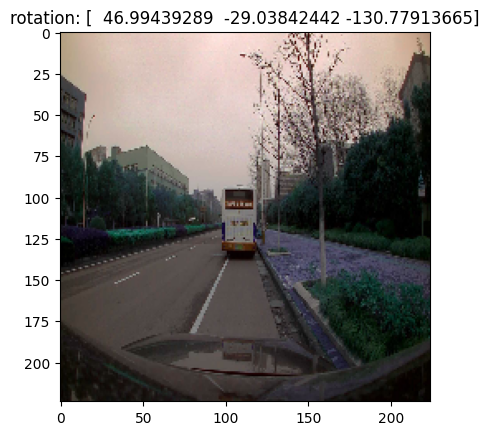

In [46]:
prev_rot = [0,0,0]
for elem in people_seqs:
    pos = elem['pos']
    image = elem["image_array"]
    for i in range(1, len(pos)):
        p = pos[i] - pos[i-1]
        rotation = Rotation.from_quat(p[:4]).as_euler('zyx', degrees=True)        
        plt.imshow(image[i-1])
        plt.title(f"rotation: {rotation}")
        plt.savefig(f"./images/{i-1}.png")
        prev_rot = rotation
        if i > 15: break
    break
    

In [28]:
rotation = Rotation.from_quat(pos[:4]).as_euler('zyx', degrees=True)

In [21]:
rotation[0]


-3.9987035835581395

In [5]:
angles = [list(seq["angle"]) for seq in people_seqs]

In [34]:
flat_list = np.array([item for sublist in angles for item in sublist])

In [35]:
mi = flat_list.min()
ma = flat_list.max()
rang = ma - mi

In [36]:
mi, ma, rang

(2.1073424e-08, 1.5222348, 1.5222348)

In [37]:
flat_list.sort()

In [39]:
np.median(flat_list)

0.00018448659

In [50]:
an_array = flat_list
mean = np.mean(an_array)
standard_deviation = np.std(an_array)
distance_from_mean = abs(an_array - mean)
max_deviations = 3
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = an_array[not_outlier]

In [53]:
no_outliers.min(), no_outliers.max(), no_outliers.max()  - no_outliers.min()

(2.1073424e-08, 0.102598816, 0.102598794)